In [1]:
import pandas as pd
import numpy as np
from scipy.sparse.linalg import svds
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.isna().sum()

Reviewer       2
Recommend      0
Stars          0
Date           0
Product        0
Category       0
Date Scrape    0
Url            0
dtype: int64

In [4]:
data = data.dropna()


In [5]:
data.duplicated().sum()
data.drop_duplicates(keep = "first", inplace = True)

In [6]:
id_count = pd.crosstab(index=data.Reviewer,columns='count').sort_values(by='count',ascending=True)

In [7]:
data = pd.read_csv("data.csv")
data.drop_duplicates(keep = "first", inplace = True)
data.drop(['Recommend','Date','Date Scrape','Url','Category'], axis=1, inplace=True)
data.rename(columns={'Stars':'Rating'}, inplace=True)
data = (data[~(data['Reviewer'] == ' ')])

In [8]:
name_r = id_count[id_count['count']>1]
name_u = name_r.index.to_list()
data = data[data.Reviewer.isin(name_u)]

In [9]:
data

,Reviewer,Rating,Product
0,Ayuika,3,Perfect 3D Gel
1,yustinalupit,4,Perfect 3D Gel
2,evikdanny,3,Perfect 3D Gel
3,daniskhoirun,3,Perfect 3D Gel
4,hulahup19,5,Perfect 3D Gel
...,...,...,...
164239,steph91,4,Ultra Rapid Action Pad
164240,farishaalamsyah,1,Ultra Rapid Action Pad
164241,imeldanababan,4,Ultra Rapid Action Pad
164242,princessvie,3,Ultra Rapid Action Pad


In [10]:
uniq_product = data['Product'].nunique()
print("Количество уникальных продуктов:",uniq_product)

Количество уникальных продуктов: 3297


In [11]:
uniq_reviewer = data['Reviewer'].nunique()
print("Количество уникальных пользователей:",uniq_reviewer)

Количество уникальных пользователей: 22359


(array([2.0000e+00, 0.0000e+00, 5.1450e+03, 0.0000e+00, 1.1718e+04,
        0.0000e+00, 2.6710e+04, 0.0000e+00, 4.2248e+04, 5.1469e+04]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

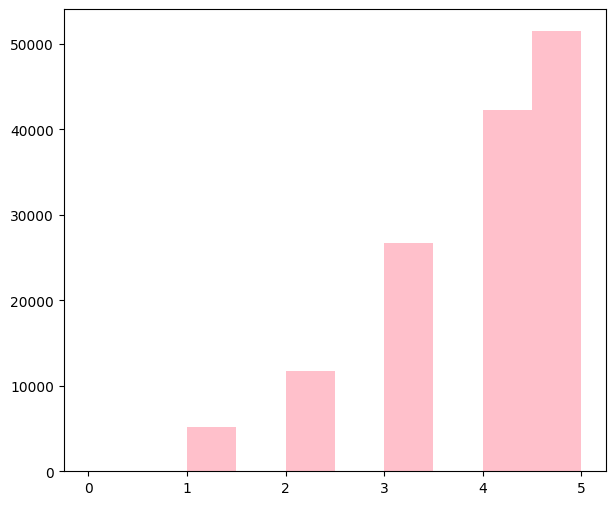

In [12]:
plt.subplots(figsize = (7,6))
plt.hist(data['Rating'],color="pink")

In [13]:
matrix_pivot = pd.pivot_table(data,values='Rating',index='Reviewer',columns='Product').fillna(0)
matrix_pivot.head()

Product,"0,2 mm Therapy Air Mask Sheet",10% Lactic Acid (Infused with Rose),100% Cold-Pressed Virgin Marula Oil,100% Organic Cold-Pressed Borage Seed Oil,100% Organic Cold-Pressed Rose Hip Seed Oil,100% Plant-Derived Squalane,100% Pure Camellia Dry Oil,100% Snail mucus Soothing Gel,14% AHA Swipes,2 Minutes Brightening Gel,...,wardah seaweed intensive night cream,wardah suncare,watermelon glow,white beauty aqua facial wash with plant extract,whitening plus complex,whitening soap,wonder pore,zaitun oil,“Buffet”,“B” oil
Reviewer,,,,,,,,,,,,,,,,,,,,,
01lely,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01putrisalma,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01sary,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123hayoapa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15ayusafitri,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [14]:
matrix_pivot_ = matrix_pivot.values
user_ratings_mean = np.mean(matrix_pivot_, axis = 1)
user_rating = matrix_pivot_ - user_ratings_mean.reshape(-1,1)

In [15]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(user_rating, k = 50)

In [16]:
sigma = np.diag(sigma)

In [17]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_ratings_mean.reshape(-1, 1)

In [18]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = matrix_pivot.columns, index=matrix_pivot.index)
preds_df

Product,"0,2 mm Therapy Air Mask Sheet",10% Lactic Acid (Infused with Rose),100% Cold-Pressed Virgin Marula Oil,100% Organic Cold-Pressed Borage Seed Oil,100% Organic Cold-Pressed Rose Hip Seed Oil,100% Plant-Derived Squalane,100% Pure Camellia Dry Oil,100% Snail mucus Soothing Gel,14% AHA Swipes,2 Minutes Brightening Gel,...,wardah seaweed intensive night cream,wardah suncare,watermelon glow,white beauty aqua facial wash with plant extract,whitening plus complex,whitening soap,wonder pore,zaitun oil,“Buffet”,“B” oil
Reviewer,,,,,,,,,,,,,,,,,,,,,
01lely,-0.033156,-0.004630,-0.003819,-0.009635,0.049237,0.014808,-0.006243,0.008375,-0.006995,-0.016372,...,0.051089,0.095433,-0.023493,-0.006377,-0.011017,-0.006941,-0.016992,-0.016342,0.024577,-4.931434e-03
01putrisalma,0.010625,0.000792,0.002254,0.000406,0.019684,0.011667,-0.000244,-0.000047,-0.000289,0.007549,...,-0.005508,-0.006456,0.005506,0.000164,-0.000872,-0.002055,-0.000035,0.005095,0.025665,7.925640e-04
01sary,0.001551,-0.001476,-0.000705,0.000370,0.005365,-0.010139,-0.000186,0.000662,-0.001281,-0.000038,...,-0.001220,0.000716,-0.003138,-0.000447,0.000854,-0.005362,0.007784,-0.002074,0.006341,-1.701105e-03
123hayoapa,0.015527,0.003253,-0.000977,0.002198,0.016848,0.000153,0.001836,0.003370,0.003455,0.015547,...,0.001470,-0.005247,0.002946,-0.006080,-0.002993,-0.000281,-0.008534,0.002337,0.013906,5.204980e-07
15ayusafitri,0.003480,0.002537,0.003241,0.002244,0.001346,-0.003409,0.002856,0.002452,0.002358,-0.000510,...,0.005033,0.011756,0.001465,0.007603,0.004751,0.015957,0.006410,0.011011,-0.009111,1.148843e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zvnazole,-0.005587,0.001457,0.004361,0.001318,0.015749,0.006207,0.001661,0.001480,0.000950,0.001608,...,-0.000520,0.006899,0.002039,0.004319,0.001492,0.009487,-0.003006,0.007397,0.005029,3.074178e-03
zyshalu,-0.013294,-0.001248,-0.001276,-0.002949,0.003175,-0.008640,-0.002109,0.004431,-0.002174,-0.007665,...,0.011587,0.027956,-0.003444,0.000228,-0.004142,-0.005065,0.012997,0.002577,0.011154,2.718208e-04
zzarahs,-0.003167,0.001298,0.004880,0.002201,0.007945,0.011677,0.001442,0.003583,0.000730,0.001116,...,0.001149,0.000714,0.003517,0.002938,0.002578,-0.000124,0.005001,0.000291,0.017409,4.559316e-03


In [29]:
def recommend_product(predictions_df, user, data_,num_recommendations):
    user_row_number = user
    sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending=False)

    user_data = data_[data_.Reviewer == (user)]
    user_full = user_data


    print('Пользователь {0} уже оценил {1} продукт'.format(user, user_full.shape[0]))

    a = data.drop_duplicates(subset='Product', keep='last')
    recommendations = (a[~a['Product'].isin(user_full['Product'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'Product',
               right_on = 'Product').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
                      )

    return user_full, recommendations

In [28]:
user = str(input("Введите id пользователя, которому будет рекомендован товар : "))
already_rated, predictions = recommend_product(preds_df, user, data,10)

Введите id пользователя, которому будет рекомендован товар :  123hayoapa


Пользователь 123hayoapa уже оценил 4 продукт


In [30]:
already_rated

,Reviewer,Rating,Product
81939,123hayoapa,5,Tea Tree Skin Clearing Night Mask
82969,123hayoapa,5,Laneige lip sleeping mask
102092,123hayoapa,4,Charcoal Mint Mud Mask
104074,123hayoapa,3,Japanese Matcha Tea Deep Cleansing Mask


In [31]:
prod_pred = predictions['Product']
prod_pred

2340                  Tea Tree Skin Clearing Facial Wash
2197                                            Mud Mask
2950                              Bio-Peel Gauze Peeling
2255                               Let It Glow Clay Mask
1510                          DROPS OF YOUTH Concentrate
3172                                        Hydrabio H2O
2158    Chinese Ginseng & Rice Clarifying Polishing Mask
1975                      Collagen impact essential mask
1675                          DROPS OF YOUTH Liquid Peel
1542                                      Hydrabio Serum
Name: Product, dtype: object

In [32]:
real_ratings = matrix_pivot_.copy()

predicted_ratings = preds_df.values

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_ratings, predicted_ratings)
print(f'MSE: {mse}')

MSE: 0.026046772258431612


In [33]:
threshold = 3.5  #если рейтинг выше этого порога, считаем, что продукт рекомендован

# Преобразование предсказанных рейтингов в бинарные значения (рекомендовано/не рекомендовано)
binary_predictions = (predicted_ratings > threshold).astype(int)

# Преобразование реальных рейтингов в бинарные значения
binary_real_ratings = (real_ratings > threshold).astype(int)

# Вычисление True Positives, False Positives и False Negatives
true_positives = np.sum(np.logical_and(binary_predictions == 1, binary_real_ratings == 1))
false_positives = np.sum(np.logical_and(binary_predictions == 1, binary_real_ratings == 0))
false_negatives = np.sum(np.logical_and(binary_predictions == 0, binary_real_ratings == 1))

# Вычисление Precision и Recall
precision = true_positives / (true_positives + false_positives)
recall = true_positives / (true_positives + false_negatives)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Precision: 0.9779125836055375
Recall: 0.06899162706991342
